Local outlier factor (LOF) is an algorithm that identifies the outliers present in the dataset. But what does the local outlier mean?

When a point is considered as an outlier based on its local neighborhood, it is a <b>local outlier.</b> 
LOF will identify an outlier considering the density of the neighborhood. LOF performs well when the density of the data is not the same throughout the dataset.

Reference link : https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X, y = make_regression(n_samples=150, n_features=2, noise=1, random_state=42)
X[:5]

array([[ 0.25049285,  0.34644821],
       [ 0.05820872, -1.1429703 ],
       [ 0.21409374, -1.24573878],
       [-0.83921752, -0.30921238],
       [ 0.36163603, -0.64511975]])

In [3]:
df=pd.DataFrame(X)
df.head()

,0,1
0,0.250493,0.346448
1,0.058209,-1.142970
2,0.214094,-1.245739
3,-0.839218,-0.309212
4,0.361636,-0.645120


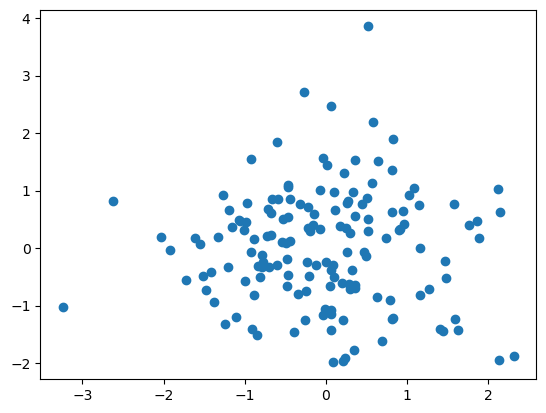

In [4]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [15]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5,p=2,metric='minkowski',algorithm='auto',contamination=0.1)
lof.fit(df)
lof_predictions = lof.fit_predict(df)
lof_predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [16]:
import numpy as np
index = np.where(lof_predictions<0)
index

(array([ 13,  26,  38,  42,  66,  78,  85,  90,  92, 109, 121, 122, 126,
        134, 136], dtype=int64),)

In [17]:
x=df.values

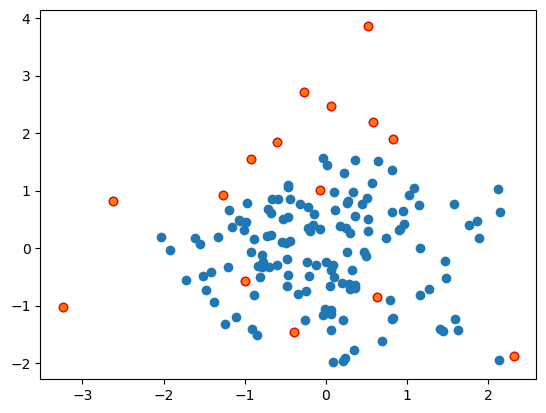

In [18]:
index = np.where(lof_predictions<0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors='r')